Implementing and Analyzing K-Means Clustering from Scratch

Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans as SKKMeans

Custome K-Means Implementation from Scratch

In [2]:
class KMeansScratch:
    def __init__(self, n_clusters=8, max_iter=300, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centroids = None
        self.inertia = None

    def fit(self, X):
        if self.random_state is not None:
            np.random.seed(self.random_state)
        
        idx = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[idx]
        
        for _ in range(self.max_iter):

            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            

            labels = np.argmin(distances, axis=1)
            

            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])
            

            if np.allclose(self.centroids, new_centroids):
                break
            self.centroids = new_centroids

        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        min_distances = np.min(distances, axis=1)
        self.inertia = np.sum(min_distances ** 2)
        
        return self

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

1. Generate Synthetic 2D Dataset

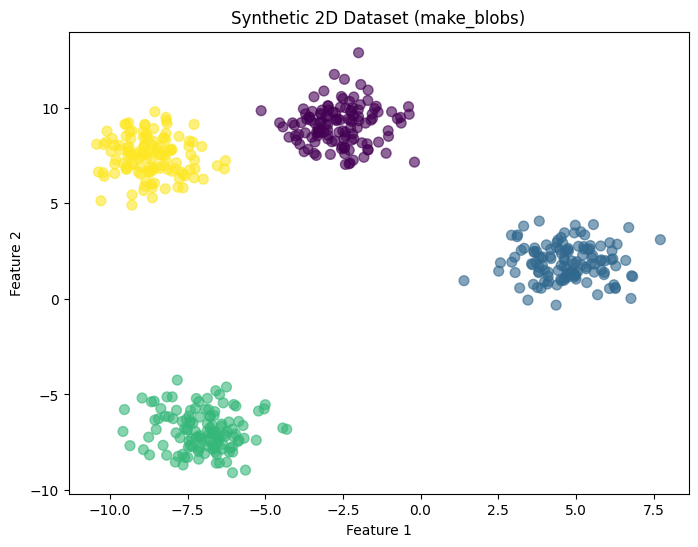

In [3]:
X, y = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, alpha=0.6)
plt.title('Synthetic 2D Dataset (make_blobs)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

2. Elbow Method Analysis

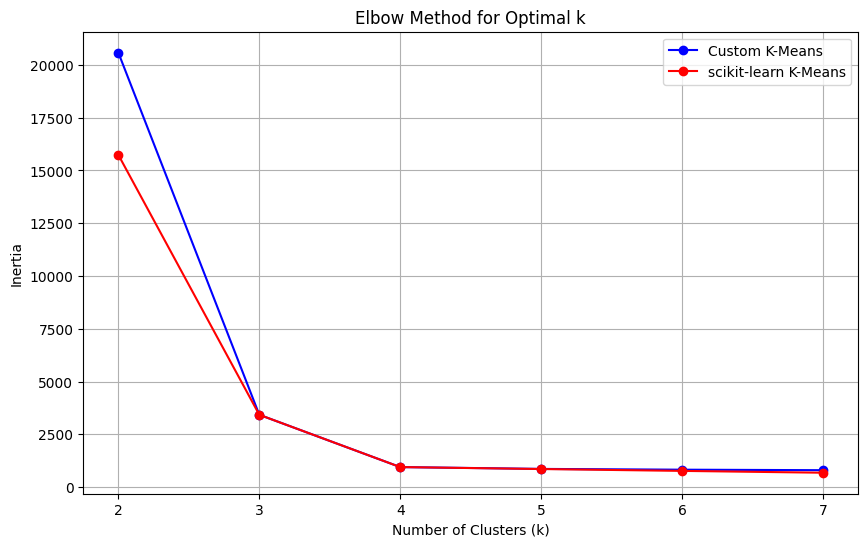

In [4]:
k_values = range(2, 8)
inertias_custom = []
inertias_sklearn = []

for k in k_values:
    
    km_custom = KMeansScratch(n_clusters=k, random_state=42)
    km_custom.fit(X)
    inertias_custom.append(km_custom.inertia)
    
    
    km_sklearn = SKKMeans(n_clusters=k, random_state=42, n_init=10)
    km_sklearn.fit(X)
    inertias_sklearn.append(km_sklearn.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(k_values, inertias_custom, 'bo-', label='Custom K-Means')
plt.plot(k_values, inertias_sklearn, 'ro-', label='scikit-learn K-Means')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.legend()
plt.grid(True)
plt.show()

3. Optimal k Clustering Results

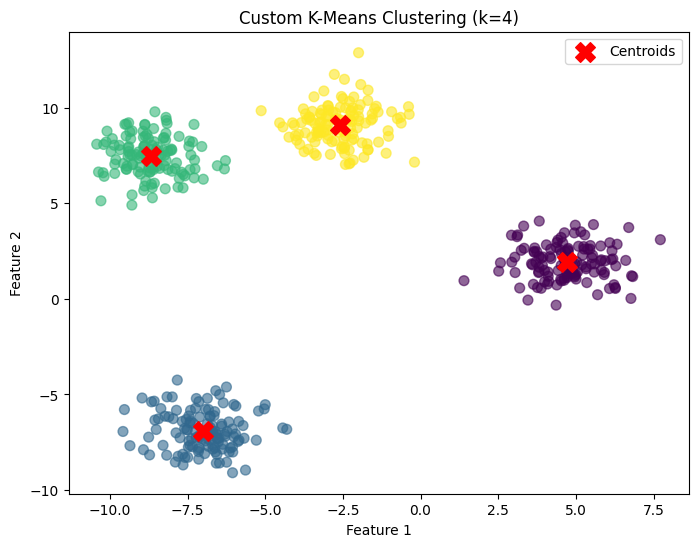

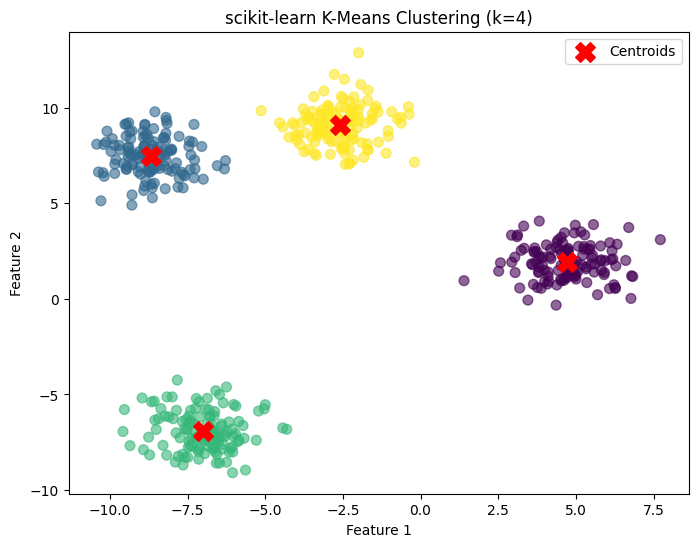

In [5]:
optimal_k = 4

km_custom = KMeansScratch(n_clusters=optimal_k, random_state=42)
km_custom.fit(X)
labels_custom = km_custom.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_custom, cmap='viridis', s=50, alpha=0.6)
plt.scatter(km_custom.centroids[:, 0], km_custom.centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title(f'Custom K-Means Clustering (k={optimal_k})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

km_sklearn = SKKMeans(n_clusters=optimal_k, random_state=42, n_init=10)
km_sklearn.fit(X)
labels_sklearn = km_sklearn.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_sklearn, cmap='viridis', s=50, alpha=0.6)
plt.scatter(km_sklearn.cluster_centers_[:, 0], km_sklearn.cluster_centers_[:, 1], 
            c='red', s=200, marker='X', label='Centroids')
plt.title(f'scikit-learn K-Means Clustering (k={optimal_k})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

4. Results Comparison

In [6]:
print(f"Optimal k: {optimal_k}\n")

print("Inertia Comparison:")
print(f"Custom K-Means Inertia: {km_custom.inertia:.4f}")
print(f"scikit-learn K-Means Inertia: {km_sklearn.inertia_:.4f}\n")

print("Centroids Comparison:")
for i in range(optimal_k):
    print(f"Cluster {i+1}:")
    print(f"  Custom: {km_custom.centroids[i]}")
    print(f"  scikit-learn: {km_sklearn.cluster_centers_[i]}\n")

Optimal k: 4

Inertia Comparison:
Custom K-Means Inertia: 948.8903
scikit-learn K-Means Inertia: 948.8903

Centroids Comparison:
Cluster 1:
  Custom: [4.72182456 1.9238556 ]
  scikit-learn: [4.72182456 1.9238556 ]

Cluster 2:
  Custom: [-7.0009649  -6.90445754]
  scikit-learn: [-8.68153751  7.4554521 ]

Cluster 3:
  Custom: [-8.68153751  7.4554521 ]
  scikit-learn: [-7.0009649  -6.90445754]

Cluster 4:
  Custom: [-2.60221541  9.09243505]
  scikit-learn: [-2.60221541  9.09243505]

